In [48]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

The data set was obtained from Kaggle and details weekly retail data for retail volume(units) and price of avocados. The data starts in 2015 and contains various details related to the logistics of avocados shipped for each week up until the end of Q1 2018. 

In [49]:
df = pd.read_csv("avocado.csv")
df = pd.DataFrame(df)
df.isnull().any()

Index           False
Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
dtype: bool

In order to analyze the data I turned it into a dateframe and checked for null values, finding none. Since the data for 2018 is not a complete representation of the whole year, I removed 2018 information. Since I will use the data to create a predictive model, I performed additional feature engineering to prepare our data for this model later.

In [50]:
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month
df["Week"] = df["Date"].dt.week
df = df[df['year'] != 2018]

In [51]:
df.dtypes

Index                    int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
Month                    int64
Week                     int64
dtype: object

In [52]:
cols = ["AveragePrice", "Total Volume", "4046", "4225", "4770", "Total Bags", "Small Bags", "Large Bags", "XLarge Bags"]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis = 1)

Avocado Price Trend Analysis

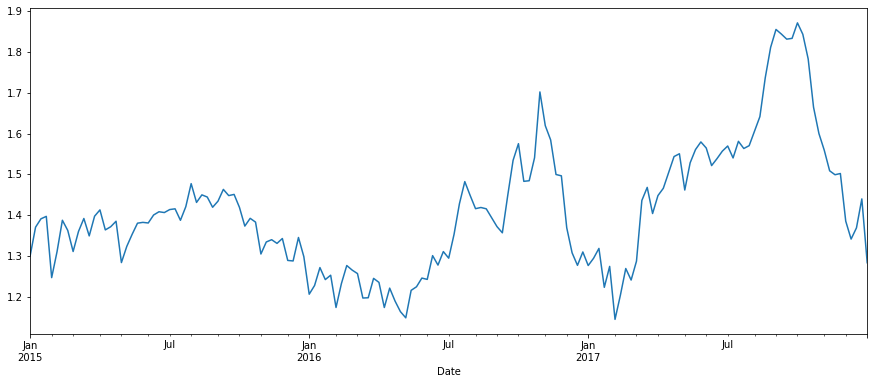

In [55]:
forecast = df.groupby("Date")["AveragePrice"].agg(np.mean)
forecast.plot(figsize = (15,6))

In [56]:
df.groupby("year")["AveragePrice"].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2015,5615.0,1.375590,0.375595,0.49,1.07,1.30,1.67,2.79
2016,5616.0,1.338640,0.393708,0.51,1.04,1.30,1.56,3.25
2017,5722.0,1.515128,0.432906,0.44,1.22,1.49,1.77,3.17


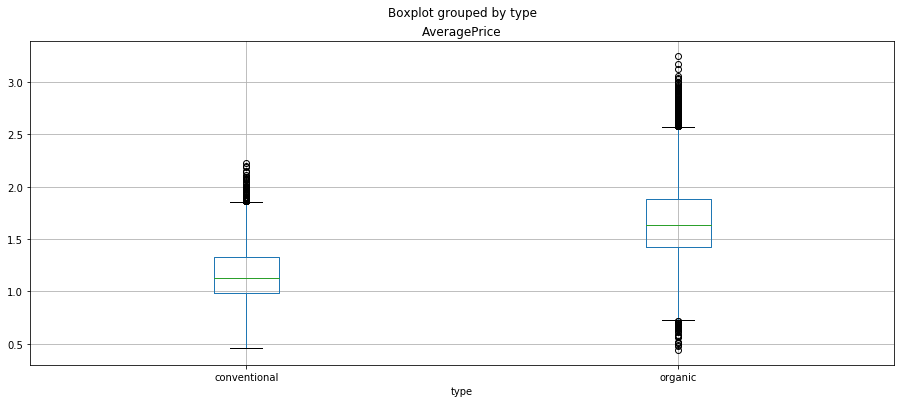

In [57]:
df.boxplot(column = "AveragePrice", by = "type", figsize = (15,6))

In [58]:
df.groupby("region")["AveragePrice"].agg(np.mean).sort_values(ascending=False)

region
HartfordSpringfield    1.829427
SanFrancisco           1.823662
NewYork                1.739268
Philadelphia           1.646146
Sacramento             1.632994
Charlotte              1.615478
Northeast              1.611688
Albany                 1.570605
RaleighGreensboro      1.556656
Chicago                1.556401
BaltimoreWashington    1.546146
Syracuse               1.540955
BuffaloRochester       1.539045
Boston                 1.527389
HarrisburgScranton     1.526783
GrandRapids            1.518503
Orlando                1.517803
Jacksonville           1.515096
NorthernNewEngland     1.481688
Spokane                1.447166
Plains                 1.442389
Seattle                1.441624
MiamiFtLauderdale      1.434936
StLouis                1.427930
Tampa                  1.414809
SouthCarolina          1.413599
Midsouth               1.408312
Southeast              1.405287
California             1.394108
SanDiego               1.392070
LasVegas               1.379936
P

Volume Analytics

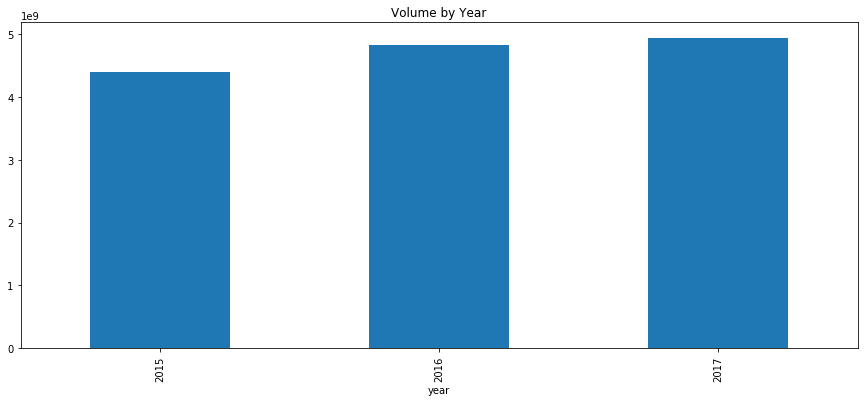

In [59]:
total_volume = df.groupby("year")["Total Volume"].agg(sum)
total_volume.plot(kind = "bar", figsize = (15,6), title = "Volume by Year")

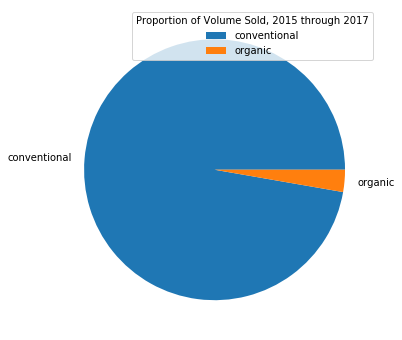

In [60]:
values = total_volume_type.values 
fig = plt.figure(figsize =(15, 6)) 
plt.pie(values, labels = df["type"].unique())  
plt.legend(title = "Proportion of Volume Sold, 2015 through 2017")
plt.show() 

Creating the Predictive Model

Now that we have an understanding of the type of details that influence the average price of avocados, I extracted the details that are most signficant in predicting the average avocado price.

In [61]:
cols = ["AveragePrice", "Total Volume", "Small Bags", "Large Bags", "XLarge Bags", "type", "region", "Month", "Week"]
data_model = df[cols]
data_model = pd.get_dummies(data_model)
lin_model = linear_model.LinearRegression()

In [62]:
##extracting X and Y variables
Y = data_model["AveragePrice"]
X = data_model.drop(["AveragePrice"], axis = 1)


In [63]:
##creating the model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=9)
lin_model.fit(X_train, Y_train)
pred = lin_model.predict(X_test)

In [64]:
##model results
test_set_rmse = (np.sqrt(mean_squared_error(Y_test, pred)))
test_set_r2 = r2_score(Y_test, pred)

In [65]:
model_results = pd.DataFrame(data = Y_test.values, columns = ["Actual"])
pred = pd.DataFrame(data = pred, columns = ["Prediction"])
model_results["Prediction"] = pred.values
model_results["Variance"] = model_results["Actual"] - model_results["Prediction"]


Model Results

In [66]:
print("The model's RMSE is ",test_set_rmse)
print("The model's R2 is ", test_set_r2)
model_results["Variance"].describe()

The model's RMSE is  0.2708342506958821
The model's R2 is  0.5764797643038403


count    3391.000000
mean        0.000703
std         0.270873
min        -0.928049
25%        -0.165190
50%        -0.011781
75%         0.152859
max         1.267295
Name: Variance, dtype: float64

As we look at a summary of of the model's results we see that the average variance from actual is <1. Our R2 is about 60% which is a pretty substantial figure. Furthermore the average standard deviation our variance is explained by the RMSE and is not that significant. Perhaps there are more variables that influence the average price but the model thus far is pretty reliable.